In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
ticker = 'SPY'
data = yf.download(ticker, start='2001-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,132.000000,132.156250,127.562500,128.812500,83.495087,8737500
2001-01-03,128.312500,136.000000,127.656250,135.000000,87.505775,19431600
2001-01-04,134.937500,135.468750,133.000000,133.546875,86.563866,9219000
2001-01-05,133.468750,133.625000,129.187500,129.187500,83.738190,12911400
2001-01-08,129.875000,130.187500,127.687500,130.187500,84.386383,6625300
...,...,...,...,...,...,...
2023-12-22,473.859985,475.380005,471.700012,473.649994,470.664490,67126600
2023-12-26,474.070007,476.579987,473.989990,475.649994,472.651886,55387000
2023-12-27,475.440002,476.660004,474.890015,476.510010,473.506500,68000300


<Axes: xlabel='Date'>

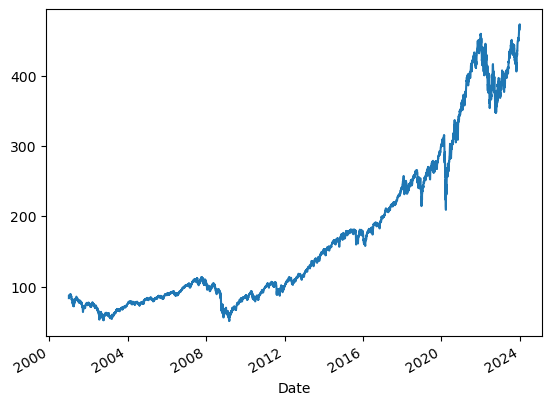

In [5]:
data["Adj Close"].plot()

<Axes: xlabel='Date'>

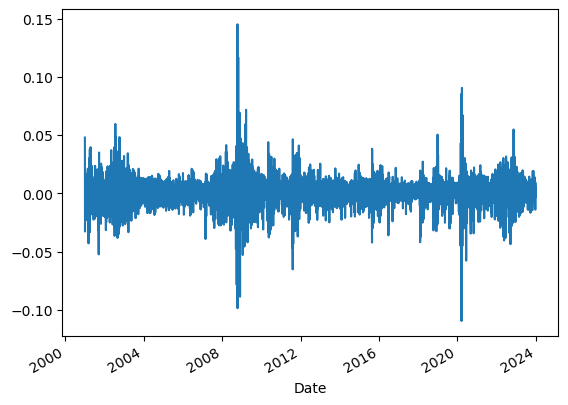

In [7]:
data["Pct_Return"] = data["Adj Close"].pct_change()
data["Pct_Return"].plot()


In [9]:
data["state"] = np.where(data["Pct_Return"] >= 0, "up", "down")

In [10]:
data

,Open,High,Low,Close,Adj Close,Volume,Pct_Return,state
Date,,,,,,,,
2001-01-02,132.000000,132.156250,127.562500,128.812500,83.495087,8737500,NaN,down
2001-01-03,128.312500,136.000000,127.656250,135.000000,87.505775,19431600,0.048035,up
2001-01-04,134.937500,135.468750,133.000000,133.546875,86.563866,9219000,-0.010764,down
2001-01-05,133.468750,133.625000,129.187500,129.187500,83.738190,12911400,-0.032643,down
2001-01-08,129.875000,130.187500,127.687500,130.187500,84.386383,6625300,0.007741,up
...,...,...,...,...,...,...,...,...
2023-12-22,473.859985,475.380005,471.700012,473.649994,470.664490,67126600,0.002010,up
2023-12-26,474.070007,476.579987,473.989990,475.649994,472.651886,55387000,0.004223,up
2023-12-27,475.440002,476.660004,474.890015,476.510010,473.506500,68000300,0.001808,up


In [20]:
upcount = len(data[data["state"] == "up"])
downcount = len(data[data["state"] == "down"])
up_to_up = len(data[(data["state"] == "up") & (data["state"].shift(-1) == "up")]) / len(data[data["state"] == "up"])
down_to_down = len(data[(data["state"] == "down") & (data["state"].shift(-1) == "down")]) / len(data[data["state"] == "down"])
up_to_down = len(data[(data["state"] == "down") & (data["state"].shift(-1) == "up")]) / len(data[data["state"] == "up"])
down_to_up = len(data[(data["state"] == "up") & (data["state"].shift(-1) == "down")]) / len(data[data["state"] == "down"]) 
transition_matrix = pd.DataFrame({"up": [up_to_up, down_to_up], "down": [up_to_down, down_to_down]}, index=["up", "down"])

In [22]:
print(transition_matrix)

            up      down
up    0.535624  0.464376
down  0.563720  0.435897
